# Descripción

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

In [80]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargar datos

In [81]:
# Carga el archivo de datos en un DataFrame
try:
    df = pd.read_csv(r"/content/vehicles_us.csv")
except:
    df = pd.read_csv(r"C:\Users\juane\Desktop\Practicum\Bases de datos csv\vehicles_us.csv")

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [82]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [83]:
# imprimir una muestra de los datos
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [84]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


* La tabla muestra datos ausentes en algunas columnas y error en el tipo de dato en otras.
* La columna `model_year`, `cylinders` y `odometer` muestran datos flotantes cuando deben ser números enteros. La columna `date_posted` muestra datos object
* En un orden descendiente la columna `is_4wd` es la que muestra la mayor cantidad de datos ausentes seguido de `paint_color`, `odometer`, `cylinders` y `model_year` respectivamente. 

### Conclusión
Durante el primer análisis del dataframe se logra observar datos ausentes en las columnas `model_year`, `cylinders`, `odometer`, `paint_color` y `is_4wd`. además de errores de tipo de dato en las columnas `model_year`, `cylinders`, `odometer` y `date_posted`. También al llamar el método describe se aprecia que la columna `is_4wd` muestra datos atípicos en su valor máximo y por ultimo en la columna `is_4wd` se aprecia solo un dato único, cuándo deberían ser 2.

## Próximos pasos
- Reflejar el total de ausentes por columnas
- Revisar los ausentes por columnas
- Determinar que hacer con los ausentes en cada columna
- Tratar los valores ausentes en cada columna 

## Tratar los valores ausentes (si hay)

In [85]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [86]:
porcentaje_datos_null = df.isnull().sum() / len(df) * 100
print(porcentaje_datos_null)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


In [87]:
# Para la columna is_4wd se asume que falta el dato 0 que equivale a sin trasmisión 4wd 
df['is_4wd'].fillna(0, inplace = True)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [88]:
# Para las columnas model_year y cylinders se eliminan al no superar el 10% de datos ausentes 
df_clean = df.dropna(subset=['model_year', 'cylinders']).reset_index(drop=True)
df_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
3,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [89]:
# Para la columna paint_color, Al ser una columna categórica se pasan los ausentes a otros 
df_clean['paint_color'] = df_clean['paint_color'].fillna(value='others')

In [90]:
# Datos atípicos en la columna odometer
df.loc[df['odometer'] == 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,0.0,2018-06-17,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4


In [91]:
# En presencia de datos atípicos en la columna se remplazaran por la mediana
med_clean = df_clean['odometer'].median()

df_clean['odometer'] = df_clean['odometer'].fillna(med_clean)
df_clean['odometer'].head()

0    145000.0
1    110000.0
2    113000.0
3     80903.0
4     57954.0
Name: odometer, dtype: float64

In [92]:
df_clean.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corregir los tipos de datos

In [93]:
df_clean.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [94]:
df_clean['model_year'] = df_clean['model_year'].astype('int64')
df_clean['cylinders'] = df_clean['cylinders'].astype('int64')
df_clean['odometer'] = df_clean['odometer'].astype('int64')
df_clean['is_4wd'] = df_clean['is_4wd'].astype('int64')
df_clean['date_posted'] = pd.to_datetime(df_clean['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         43009 non-null  int64         
 1   model_year    43009 non-null  int64         
 2   model         43009 non-null  object        
 3   condition     43009 non-null  object        
 4   cylinders     43009 non-null  int64         
 5   fuel          43009 non-null  object        
 6   odometer      43009 non-null  int64         
 7   transmission  43009 non-null  object        
 8   type          43009 non-null  object        
 9   paint_color   43009 non-null  object        
 10  is_4wd        43009 non-null  int64         
 11  date_posted   43009 non-null  datetime64[ns]
 12  days_listed   43009 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 4.3+ MB


## Enriquecer datos

In [96]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df_clean['dow'] = df_clean['date_posted'].dt.dayofweek  # dia de la semana que se colocó el anuncio 
df_clean['week'] = df_clean['date_posted'].dt.isocalendar().week # semana en se colocó el anuncio
df_clean['month'] = df_clean['date_posted'].dt.month  # mes que se colocó el anuncio
df_clean['year'] = df_clean['date_posted'].dt.year  # año que se colocó el anuncio

In [97]:
# Agrega los años del vehículo cuando el anuncio se colocó
df_clean['age_of_car'] = df_clean['year'] - df_clean['model_year']

In [98]:
# Agrega el millaje promedio del vehículo por año
df_clean['avg_miles_year'] = df_clean['odometer'] / df_clean['age_of_car']

In [99]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
df_clean['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [100]:
df_clean['condition'] = df_clean['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

## Comprobar datos limpios

In [101]:
# información general
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           43009 non-null  int64         
 1   model_year      43009 non-null  int64         
 2   model           43009 non-null  object        
 3   condition       43009 non-null  int64         
 4   cylinders       43009 non-null  int64         
 5   fuel            43009 non-null  object        
 6   odometer        43009 non-null  int64         
 7   transmission    43009 non-null  object        
 8   type            43009 non-null  object        
 9   paint_color     43009 non-null  object        
 10  is_4wd          43009 non-null  int64         
 11  date_posted     43009 non-null  datetime64[ns]
 12  days_listed     43009 non-null  int64         
 13  dow             43009 non-null  int64         
 14  week            43009 non-null  UInt32        
 15  mo

Notamos que la columna `avg_miles_year` muestra datos NaN e infinitos, Procedo a eliminarlos para que no interrumpan nuestros cálculos. 

In [102]:
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [103]:
df_clean.dropna(inplace=True) 

In [104]:
df_clean['avg_miles_year'].describe()

count     41070.000000
mean      18599.112439
std       15318.771456
min           0.000000
25%       10279.207386
50%       14959.892857
75%       21894.900000
max      279365.000000
Name: avg_miles_year, dtype: float64

In [151]:
# Imprimir una muestra de datos
df_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,5,17627
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,16,11343
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,9,14222
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,5,27914


In [106]:
df_clean['avg_miles_year'] = df_clean['avg_miles_year'].astype('int64')

In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41070 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           41070 non-null  int64         
 1   model_year      41070 non-null  int64         
 2   model           41070 non-null  object        
 3   condition       41070 non-null  int64         
 4   cylinders       41070 non-null  int64         
 5   fuel            41070 non-null  object        
 6   odometer        41070 non-null  int64         
 7   transmission    41070 non-null  object        
 8   type            41070 non-null  object        
 9   paint_color     41070 non-null  object        
 10  is_4wd          41070 non-null  int64         
 11  date_posted     41070 non-null  datetime64[ns]
 12  days_listed     41070 non-null  int64         
 13  dow             41070 non-null  int64         
 14  week            41070 non-null  UInt32        
 15  mo

## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

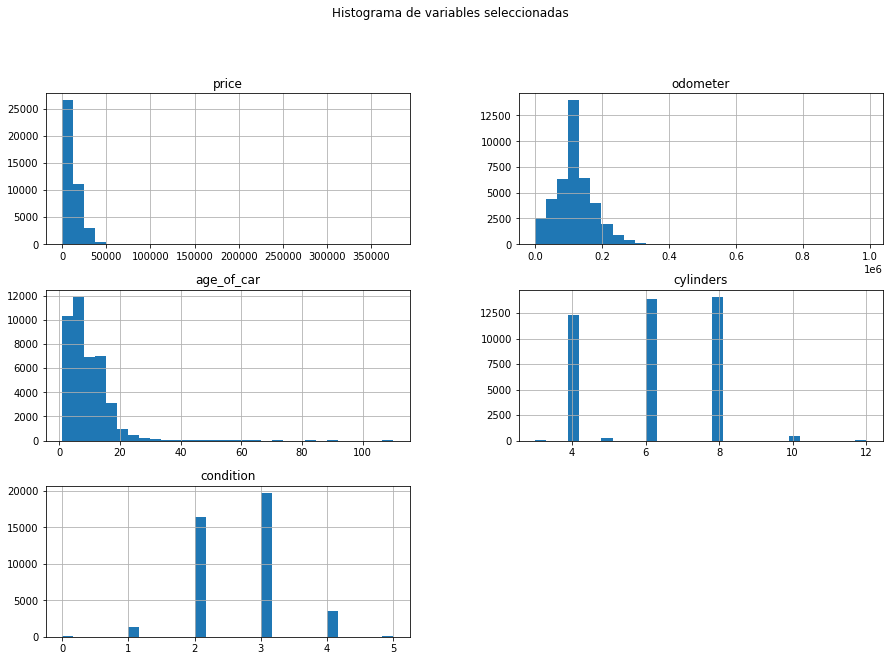

In [108]:
# Vista general Histogramas de variables seleccionadas
df_clean[['price', 'odometer', 'age_of_car','cylinders', 'condition']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograma de variables seleccionadas', y= 1);

Analicemos cada una  de las variables en profundidad

In [109]:
df_clean['price'].describe()

count     41070.000000
mean      11565.950937
std        9249.997549
min           1.000000
25%        4998.000000
50%        8995.000000
75%       15985.000000
max      375000.000000
Name: price, dtype: float64

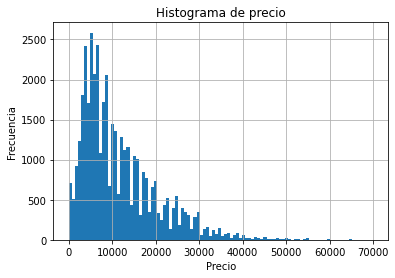

In [110]:
# Histograma de precio
df_clean['price'].hist(bins=100, range=[0, 70000])

# Titulos 
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title("Histograma de precio");

Según lo que muestra el grafico de precio el promedio de la columna esta en 11.500 sin embargo existen datos desde 1 a 375.000, podemos concluir que los datos contienen valores atípicos significativos.

In [111]:
df_clean['odometer'].describe()

count     41070.000000
mean     118718.337400
std       58127.271961
min           0.000000
25%       85000.000000
50%      113000.000000
75%      149000.000000
max      990000.000000
Name: odometer, dtype: float64

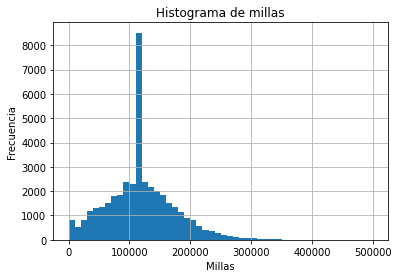

In [112]:
# Histograma de millas
df_clean['odometer'].hist(bins=50, range=[0, 500000])

# Titulos 
plt.xlabel('Millas')
plt.ylabel('Frecuencia')
plt.title("Histograma de millas");

Según lo que muestra el grafico de millas, La mayor cantidad de datos se concentra entre 0 y 200.000, El promedio de la columna esta en 118.000 sin embargo existen datos desde 0 a 990.000, podemos concluir que los datos contienen valores atípicos significativos.

In [113]:
df_clean['age_of_car'].describe()

count    41070.000000
mean         8.948843
std          6.136729
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_of_car, dtype: float64

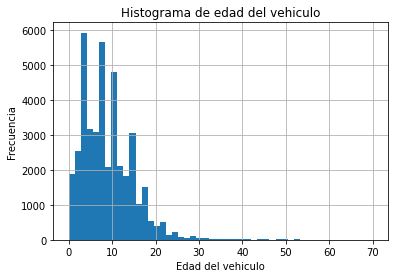

In [114]:
# Histograma de edad del vehiculo
df_clean['age_of_car'].hist(bins=50, range=[0, 70])

# Titulos 
plt.xlabel('Edad del vehiculo')
plt.ylabel('Frecuencia')
plt.title("Histograma de edad del vehiculo");

Según lo que muestra el grafico de edad del vehículo, La mayor cantidad de datos se concentra entre 0 y 18 años, El promedio de la columna esta en 8.9 sin embargo existen datos desde 1 a 110 , podemos concluir que los datos contienen valores atípicos significativos.

In [115]:
df_clean['cylinders'].describe()

count    41070.000000
mean         6.120648
std          1.657060
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

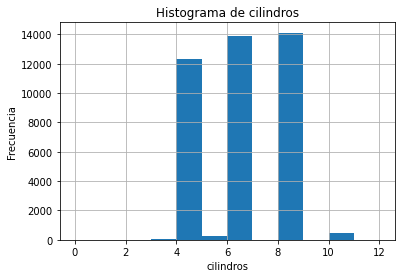

In [116]:
# Histograma de cilindros
df_clean['cylinders'].hist(bins=12, range=[0, 12])

# Titulos 
plt.xlabel('cilindros')
plt.ylabel('Frecuencia')
plt.title("Histograma de cilindros");

Según lo que muestra el grafico de cilindros , los vehículos con 6 y 8 cilindros estan mayoritariamente representados en los datos, El promedio de la columna esta en 6, podemos concluir que los datos no contienen valores atípicos significativos.

In [117]:
df_clean['condition'].describe()

count    41070.000000
mean         2.616971
std          0.701976
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

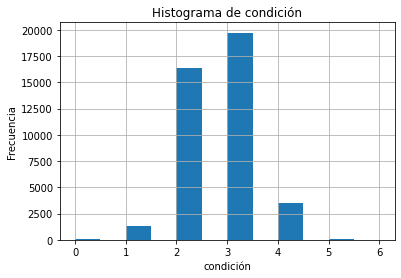

In [118]:
# Histograma de condición
df_clean['condition'].hist(bins=12, range=[0, 6])

# Titulos 
plt.xlabel('condición')
plt.ylabel('Frecuencia')
plt.title("Histograma de condición");

El histograma de la condición del vehículo muestra que la mayoría de los vehículos en el conjunto de datos están en buenas o excelentes condiciones. El promedio de la columna esta en 2.6 sin embargo existen datos desde 0 a 5 , podemos concluir que los datos no contienen valores atípicos.

### Conclusión
Luego de realizar una visualización inicial para detectar valores atípicos, podemos observar que las variables `price`, `age_of_car` y `odometer` tienen valores atípicos significativos. Dado que muestran datos como 350.000, 110 años y 990.000 millas, Respectivamente. Podemos ver que hay tantos valores atípicos en los datos que tenemos que eliminarlos antes de poder continuar con el análisis.



## Estudiar y tratar valores atípicos

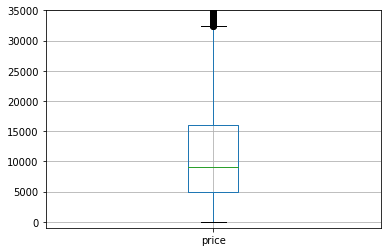

In [152]:
# Determinaremos los límites inferiores para valores atípicos
plt.ylim(-1000, 35000)
df_clean.boxplot(column='price');

In [120]:
df_clean['price'].describe()

count     41070.000000
mean      11565.950937
std        9249.997549
min           1.000000
25%        4998.000000
50%        8995.000000
75%       15985.000000
max      375000.000000
Name: price, dtype: float64

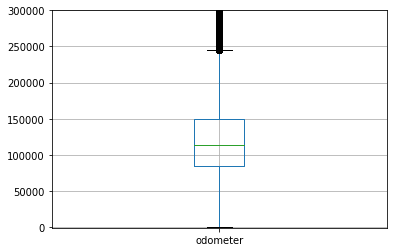

In [121]:
plt.ylim(-1000, 300000)
df_clean.boxplot(column='odometer');

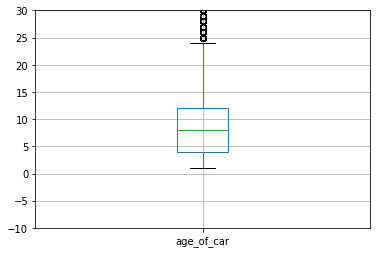

In [122]:
plt.ylim(-10, 30)
df_clean.boxplot(column='age_of_car');

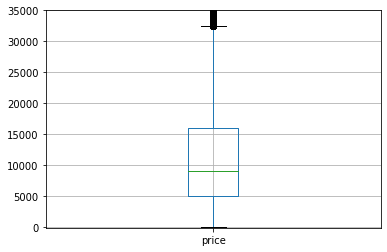

In [153]:
# Determinaremos los límites superiores para valores atípicos
plt.ylim(-100, 35000)
df_clean.boxplot(column='price');

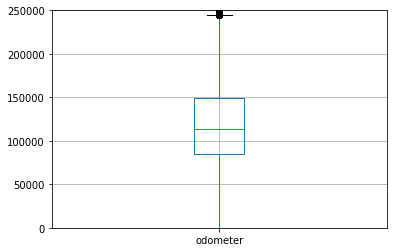

In [124]:
plt.ylim(-100, 250000)
df_clean.boxplot(column='odometer');

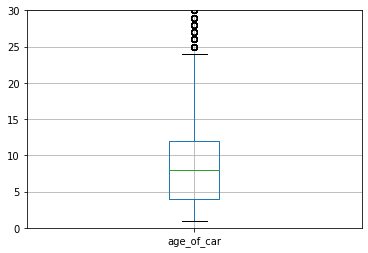

In [125]:
plt.ylim(0, 30)
df_clean.boxplot(column='age_of_car');

In [154]:
# Almacenaremos los datos sin valores atípicos en un DataFrame separado
df2 = df_clean.query('price < 33000 and odometer < 250000 and age_of_car < 24')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38434 entries, 0 to 43008
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           38434 non-null  int64         
 1   model_year      38434 non-null  int64         
 2   model           38434 non-null  object        
 3   condition       38434 non-null  int64         
 4   cylinders       38434 non-null  int64         
 5   fuel            38434 non-null  object        
 6   odometer        38434 non-null  int64         
 7   transmission    38434 non-null  object        
 8   type            38434 non-null  object        
 9   paint_color     38434 non-null  object        
 10  is_4wd          38434 non-null  int64         
 11  date_posted     38434 non-null  datetime64[ns]
 12  days_listed     38434 non-null  int64         
 13  dow             38434 non-null  int64         
 14  week            38434 non-null  UInt32        
 15  mo

## Estudiar parámetros principales sin valores atípicos

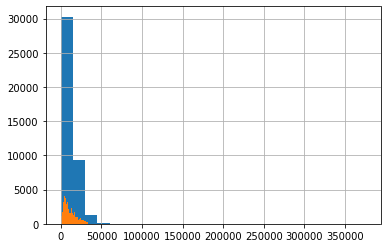

In [127]:
df_clean['price'].hist(bins=25)
df2['price'].hist(bins=25);

In [128]:
print(df_clean['price'].describe())
print('----------------------')
print(df2['price'].describe())

count     41070.000000
mean      11565.950937
std        9249.997549
min           1.000000
25%        4998.000000
50%        8995.000000
75%       15985.000000
max      375000.000000
Name: price, dtype: float64
----------------------
count    38434.000000
mean     10982.904251
std       7496.761881
min          1.000000
25%       5000.000000
50%       8990.000000
75%      15450.000000
max      32999.000000
Name: price, dtype: float64


Al comparar el grafico de datos limpios(df2) con el grafico de datos sin limpiar(df_clean) Se aprecia una reducción eficiente de datos que estaban fuera de norma. La media pasó de un 11565 a 10982. Tras esta operación nos acercamos a datos mas seguros para nuestro análisis.

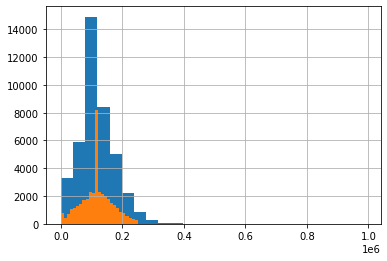

In [129]:
df_clean['odometer'].hist(bins=25)
df2['odometer'].hist(bins=25);

In [130]:
print(df_clean['odometer'].describe())
print('----------------------')
print(df2['odometer'].describe())

count     41070.000000
mean     118718.337400
std       58127.271961
min           0.000000
25%       85000.000000
50%      113000.000000
75%      149000.000000
max      990000.000000
Name: odometer, dtype: float64
----------------------
count     38434.000000
mean     115995.654785
std       50198.735913
min           0.000000
25%       86436.500000
50%      113000.000000
75%      146575.500000
max      249870.000000
Name: odometer, dtype: float64


La principal diferencia al compara ambos gráficos de la columna `odometer` es la eliminación de 2636 registro fuera de norma. La media de la columna se traslado de 118.718 a 115.995.

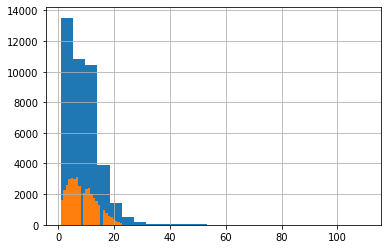

In [131]:
df_clean['age_of_car'].hist(bins=25)
df2['age_of_car'].hist(bins=25);

In [132]:
print(df_clean['age_of_car'].describe())
print('----------------------')
print(df2['age_of_car'].describe())

count    41070.000000
mean         8.948843
std          6.136729
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age_of_car, dtype: float64
----------------------
count    38434.000000
mean         8.497242
std          4.955925
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         23.000000
Name: age_of_car, dtype: float64


Las diferencias entre los datos filtrados y sin filtrar en la columna `age_of_car` son menos notorios dado que la distribución de datos dentro de la columna estaba bastante equilibrada por ende solo se eliminaron los datos fuera de norma.

## Periodo de colocación de los anuncios


In [133]:
df_clean['days_listed'].describe()

count    41070.000000
mean        39.616094
std         28.210317
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

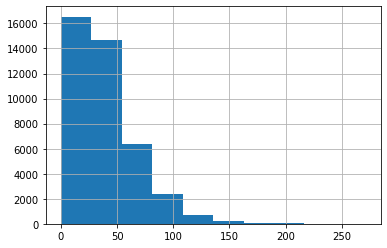

In [134]:
df_clean['days_listed'].hist();

In [135]:
print(df_clean['days_listed'].mean())
print(df_clean['days_listed'].median())

39.61609447285123
33.0


In [136]:
df_clean.query('days_listed <5').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
34,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,1,2019-03-31,1,6,13,3,2019,10,23400
103,33900,2018,chevrolet silverado 1500 crew,2,8,gas,11315,other,pickup,white,1,2019-03-01,2,4,9,3,2019,1,11315
166,5999,2012,nissan versa,3,4,gas,76737,automatic,sedan,silver,0,2018-07-31,3,1,31,7,2018,6,12789
183,7800,2012,chevrolet traverse,2,6,gas,157000,automatic,SUV,blue,1,2018-11-30,4,4,48,11,2018,6,26166
235,19900,2013,ford f-150,3,6,gas,79657,automatic,truck,silver,1,2019-03-01,4,4,9,3,2019,6,13276


In [137]:
df_clean.query('days_listed < 100').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488


In [138]:
df2 = df2.query('5 < days_listed <= 100')
df2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,5,17627
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,16,11343
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,9,14222
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,5,27914


In [139]:
days_listed_new = df_clean.query('5 <= days_listed <= 100').pivot_table(index="type", values="days_listed", aggfunc=['mean', 'count'])
days_listed_new.columns = ['days_listed_mean', 'vehiculos']
days_listed_new.sort_values(by='days_listed_mean', ascending=False).head(10)

,days_listed_mean,vehiculos
type,,
bus,41.650000,20
offroad,38.460123,163
hatchback,38.427083,768
wagon,38.064599,1161
pickup,37.456364,5099
SUV,37.310278,9253
truck,37.230736,9240
other,36.908108,185
van,36.847280,478


Los anuncios fueron mostrados entre 0 y 270 días. La media esta en 39.6 y la mediana en 33, Finalmente el periodo habitual de colocación es entre 5 y 100 días, Donde menos de 5 días es un periodo donde se eliminaron rápidamente las publicaciones y sobre 100 días equivale aun periodo largo de publicación.

Hicimos una tabla filtrada con los vehículos que tuvieron mas de 5 días de anuncio y los que tuvieron menos de 100 días, los filtraremos por tipo de vehículo, ya que me parece un buen parametro para mostrar mas claramente que en esta tabla filtrada las medias de días de anuncio son parecidos para todos los tipos de vehículos.

## Precio promedio por cada tipo de vehículo

In [140]:
vehicles_stat_price = df2.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'price', aggfunc = 'mean')
vehicles_stat = days_listed_new.join(vehicles_stat_price, on='type').reset_index()
print(vehicles_stat)

           type  days_listed_mean  vehiculos         price
0           SUV         37.310278       9253  10261.556768
1           bus         41.650000         20  16961.894737
2   convertible         36.846821        346  13178.425781
3         coupe         36.323042       1749  13027.809619
4     hatchback         38.427083        768   6596.934156
5      mini-van         36.438799        866   7756.658363
6       offroad         38.460123        163  14448.985507
7         other         36.908108        185  10374.043478
8        pickup         37.456364       5099  14509.199198
9         sedan         36.815976       9151   6835.761467
10        truck         37.230736       9240  14992.234895
11          van         36.847280        478   8208.563679
12        wagon         38.064599       1161   8895.881826


In [141]:
# Precio promedio para cada tipo de vehículo
avg_vehiculo = df2.pivot_table(index='type', values='price', aggfunc='mean')
avg_vehiculo

,price
type,
SUV,10261.556768
bus,16961.894737
convertible,13178.425781
coupe,13027.809619
hatchback,6596.934156
mini-van,7756.658363
offroad,14448.985507
other,10374.043478
pickup,14509.199198


In [142]:
# Cantida de anuncios por vehículos
df2.query('5 <= days_listed <= 100').pivot_table(
    index='type', values = 'days_listed', aggfunc = 'count').sort_values(by="days_listed", ascending=False)

,days_listed
type,
sedan,8917
SUV,8799
truck,8259
pickup,4488
coupe,1497
wagon,1117
mini-van,843
hatchback,729
van,424


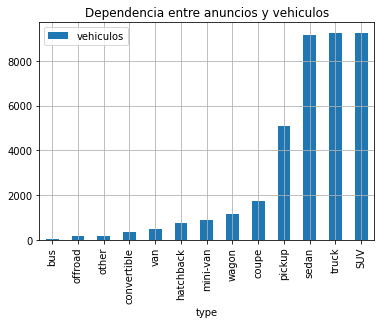

In [143]:
vehicles_stat.sort_values(by='vehiculos',ascending = True ).plot(x='type', y='vehiculos', title='Dependencia entre anuncios y vehiculos',kind='bar',grid=True);

Según los datos analizados, Las categorías de vehículos con mas anuncios son SUV y Sedan.

## Factores de precio

In [144]:
popular_vehicles_filtered = df2.query('5 <= days_listed <= 100')
popular_vehicles_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dow,week,month,year,age_of_car,avg_miles_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,others,1,2018-06-23,19,5,25,6,2018,7,20714
1,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,6,2,2019,6,18333
2,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,others,0,2019-03-22,9,4,12,3,2019,16,7062
3,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,14,4,2019,2,40451
4,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,25,6,2018,4,14488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43004,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,40,10,2018,5,17627
43005,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,46,11,2018,16,11343
43006,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,46,11,2018,9,14222
43007,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,27,7,2018,5,27914


In [145]:
print(popular_vehicles_filtered[['price', 'age_of_car', 'odometer', 'transmission', 'paint_color', 'condition']].corr())

               price  age_of_car  odometer  condition
price       1.000000   -0.530348 -0.385767   0.188071
age_of_car -0.530348    1.000000  0.489136  -0.267993
odometer   -0.385767    0.489136  1.000000  -0.236160
condition   0.188071   -0.267993 -0.236160   1.000000


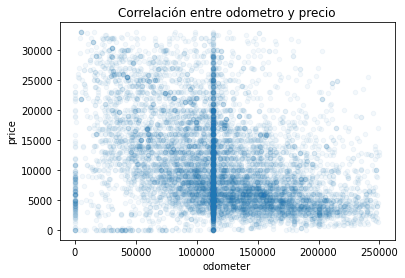

In [146]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'odometer', title= 'Correlación entre odometro y precio', alpha=0.05);

Tras visualizar el gráfico de dispersión entre odómetro y precio, podemos identificar que a mayor kilometraje menor es el precio y viceversa.

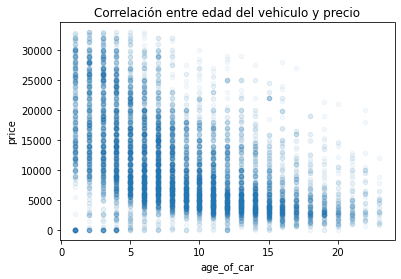

In [147]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'age_of_car', title= 'Correlación entre edad del vehiculo y precio', alpha=0.05);

Tras analizar el gráfico de dispersión entre edad del vehículo y precio concluimos que a mayor cantidad de años del vehículo menor es su precio.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


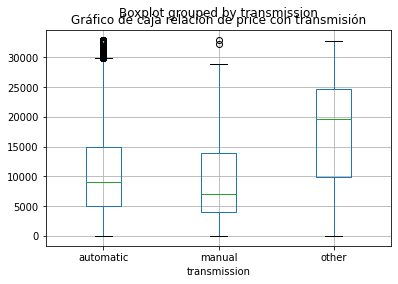

In [148]:
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='transmission', column='price'))
plt.title('Gráfico de caja relación de price con transmisión')
plt.show();

Podemos concluir que al observar el gráfico de caja los vehículos automáticos son mas costosos que los vehículos de transmisión manual.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


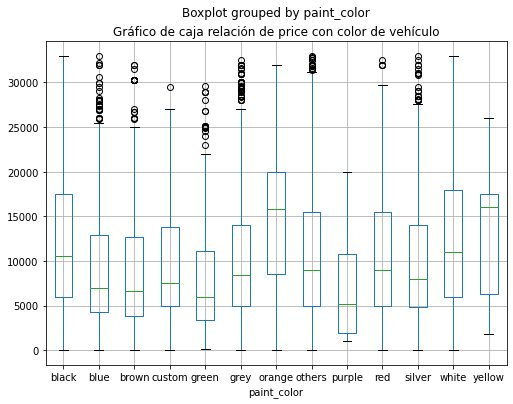

In [149]:
(popular_vehicles_filtered.query('days_listed >= 50').boxplot(by='paint_color', column='price', figsize=(8,6)))
plt.title('Gráfico de caja relación de price con color de vehículo')
plt.show();

Si bien no existe una correlación obvia. Se aprecia como dato curioso que los colores que nacen de la gama del rojo(rojo,amarillo y naranjo)son los que tienen valores mas altos.

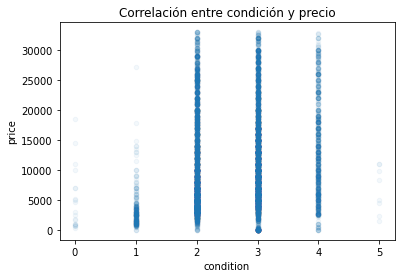

In [150]:
popular_vehicles_filtered.query('days_listed >= 50').plot.scatter(y= 'price', x= 'condition', title= 'Correlación entre condición y precio', alpha=0.05);

Podemos concluir que los vehículos que estan en estados buenos en general, Son los con mayor precio. si bien la condición 5(new)al no figurar en los precios mas altos nos da a entender que este tipo de vehículos no se compran a través de anuncios. Para las condiciones mas deplorables(0 y 1) sus precios son mas bajos.

## Conclusión general

*1-El gráfico de correlación con el kilometraje muestra una correlación negativa, es decir, cuanto mayor sea el kilometraje, menor será el precio.*

*2-Se notó una observación similar en el gráfico de correlación de la edad del vehículo con el precio. Observamos que a medida que aumenta la edad de un vehículo, el precio disminuye. Por el contrario, la gráfica del precio con los años del modelo muestra que a medida que aumenta el año del modelo del vehículo, el precio también aumenta.*

*3-El estado del vehículo es también una característica importante. Observamos a partir de los datos que los automóviles con condiciones buenas, excelentes y como nuevas tienen un precio más alto que los vehículos en otras condiciones.*

*4-Si observamos el gráfico de caja de la correlación del tipo de transmisión con el precio, podemos ver que los automóviles con transmisión automática tienen un precio más alto que los del tipo de transmisión manual. Esto muestra que el tipo de transmisión es un factor importante que afecta el precio del vehículo.*

*5-La distribución del precio del vehículo con el color, no refleja una diferencia significativa, por lo que no existe mucha relación.*

### Para poder llegar a esta conclusión, se realizó lo siguiente:

-*Primero se analizaron los datos ausentes de cada columna del df. Después se sacó el % de esos valores ausentes por columna, llegando a la conclusión que los datos ausentes de las columnas con menos %,  `model_year` y `cylinders`, se eliminarían. Las otras 3 columnas se transformaron los valores ya que el % de ausentes era mayor*

-*Luego se trabajo cambiando las columnas con tipo float a int para realizar un mejor analisis.*

-*Luego en la columna `date_posted`, se cambió de tipo objeto a datatime. Además creamos columnas de día de la semana, semana y mes de cuando fue publicado el anuncio*

-*Luego se crearon columnas de `age_of_car` y `avg_odometer_year` y se cambiaron los parametro de la columna `condition` por valores numéricos. En la columna `avg_odometer_year` aparecieron valores inf, por lo que los cambiamos a NaN y posteriormente cambiamos los NaN a valores 0.*

-*Se realizaron histogramas de las columnas a analizar para tener una vista general. Luego, se hicieron diferentes histogramas para analizar los valores atípicos. Se evaluaron los valores atípicos con gráficos de caja y se empezó a trabajar con los valores filtrados sin valores atípicos.*

-*comenzamos a trabajar con los días de publicación en nuestro nuevo dataframe, y comparamos con histogramas entre el antiguo dataframe y el nuevo.*

-*Concluimos que con el nuevo dataframe, que la media de los días de anuncio eran de 39 días, por lo que empezamos a trabajar desde ahí.*

-*Comenzamos a ver la correlación entre el precio del vehículo con las columnas de edad, millaje, condición, tipo de transmisión y color del vehículo, teniendo solo en cuenta los vehículos con mas de 50 anuncios.*